In [180]:
import torch
from utils import *
from core import *

device = 'cuda'

In [181]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
rot = 40
A = torch.load(f'../temp/matrix_200/matrix_rot_{rot}.pt')
A

tensor(indices=tensor([], size=(2, 0)),
       values=tensor([], size=(0,)),
       size=(40000, 8000000), nnz=0, layout=torch.sparse_coo)

In [183]:
projections = torch.load('test_data/projections_scaled.pt')
recons_raw = torch.load('test_data/recon_scaled.pt')
recons_raw.shape, projections.shape

(torch.Size([179, 200, 200]), torch.Size([200, 200, 200]))

In [184]:
recons = torch.zeros(200, 200, 200)
recons.shape

torch.Size([200, 200, 200])

In [185]:
recons[12:191, :, :] = recons_raw

In [186]:
proj = torch.sparse.mm(A, recons.flatten().view(-1, 1))
proj.shape

torch.Size([40000, 1])

In [187]:
img = proj.view(200, 200) * 100
img = torch.clip(img, min=10, max=17)

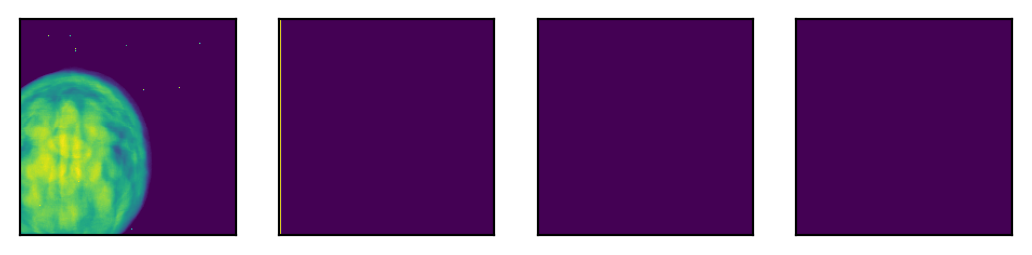

In [189]:
plot_images_line(generate_sinogram([10, 39, 40, 41], vol_recon=recons, file_path='../temp/matrix_200'))

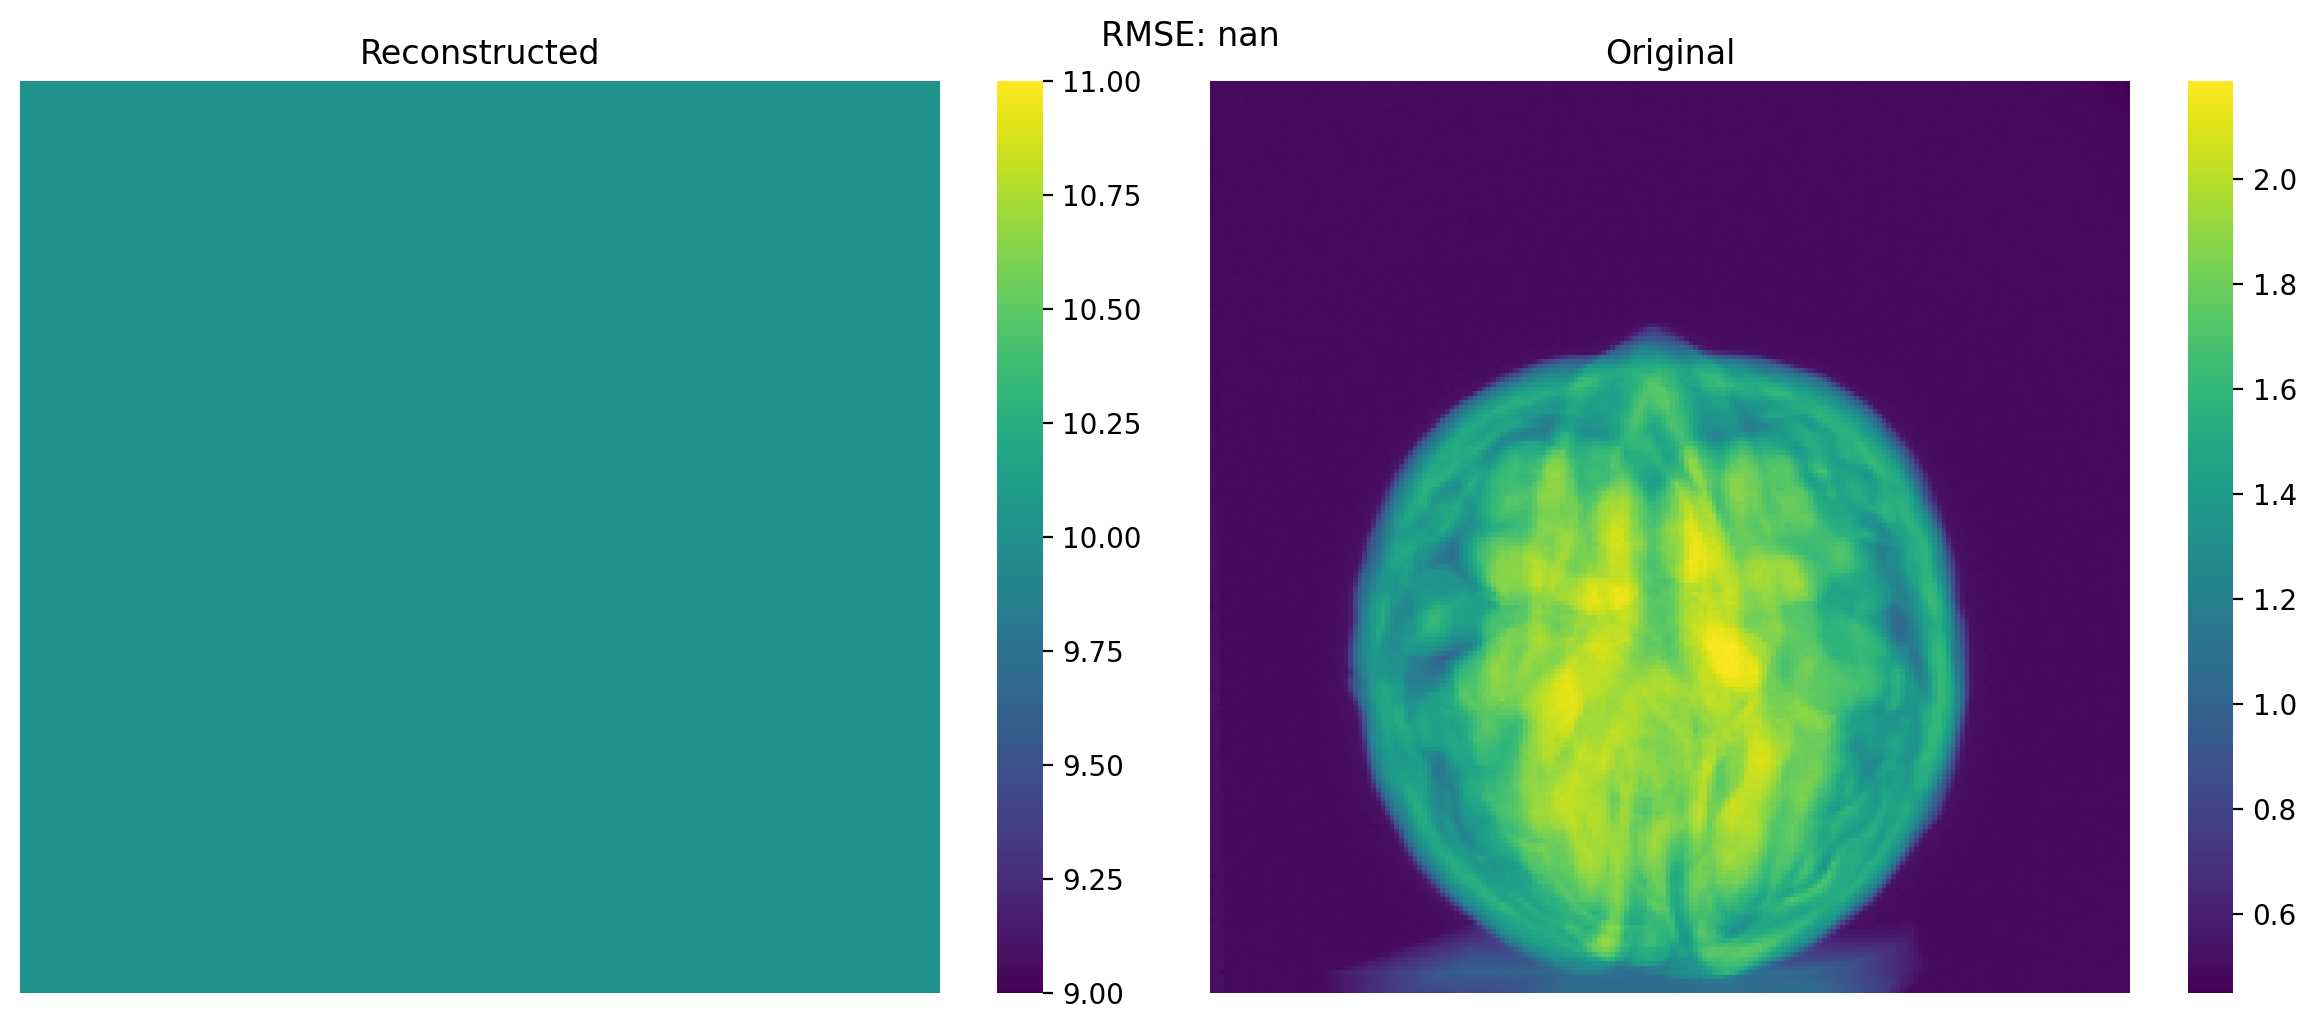

In [188]:
plot_2d_comparison(img, projections[:, :, 40])